[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


Saving the record...


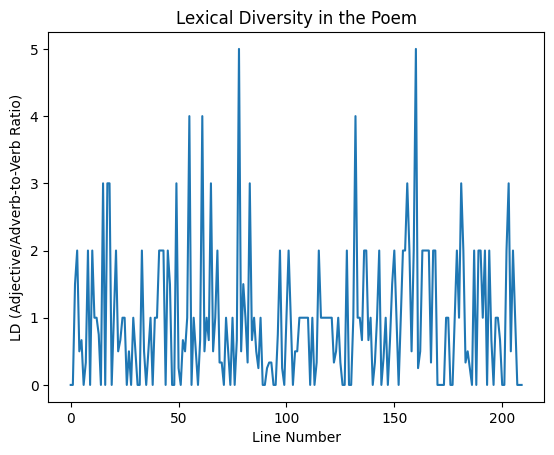

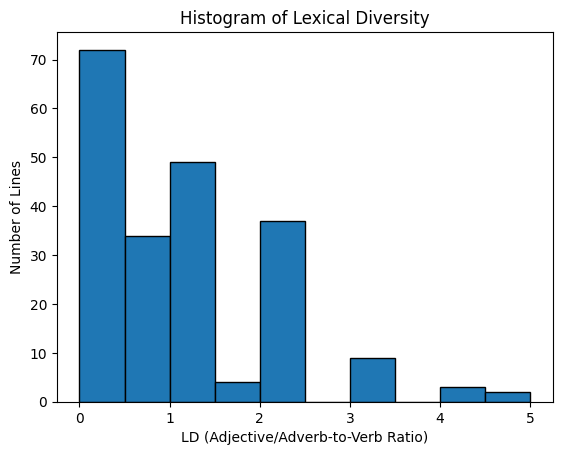

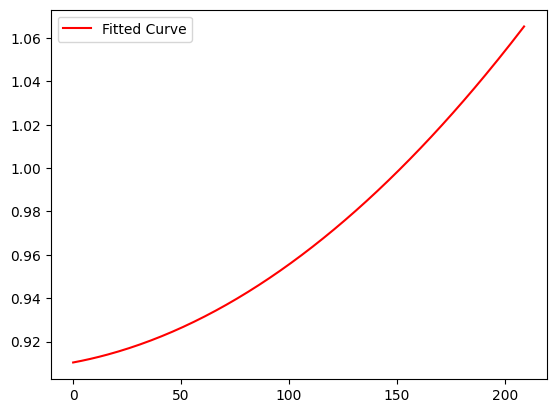

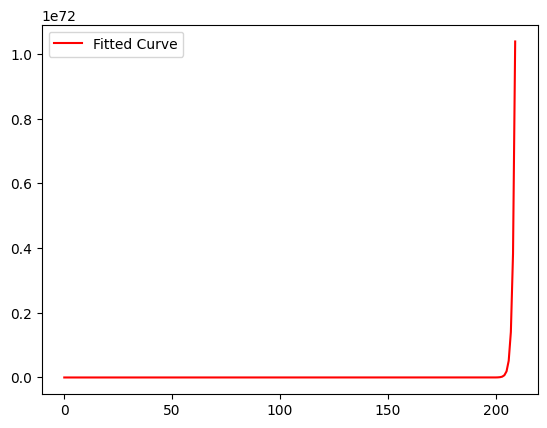

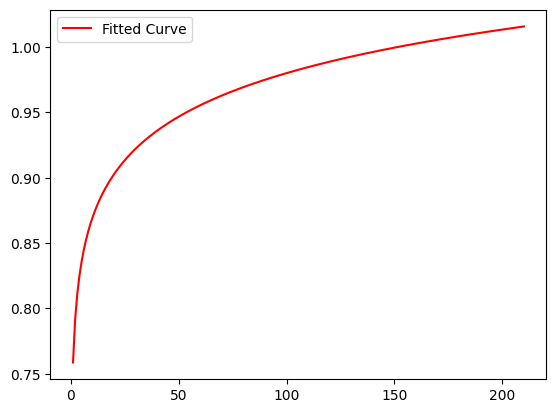

In [4]:
"""
We now consider the lexical diversity LD in the poem. This can be expressed
using the adjective/adverb-to-verb ratio
(number of adjectives and adverbs to the number of verbs)
in each line of the poem. Using part-of-speech tagging that identifies verb
adjective and adverb entities, suggest a program that calculates LD for each
line of the code. Save the result in the database. Plot the graph of LD.
Suggest a 10-equal subdivision of values of LD (take the highest value of
LD and subtract the smallest value of LD and divide by 10 to find the bin
value, and then take the smallest of LD and add bin, then 2*bin, etc.. to
find the next interval (You will end up with 10 intervals). Now calculate
and plot the corresponding histogram (calculating the number of lines of
poem whose LD value fall within a specific interval). Find out whether a
parametric fitting (polynomial, logarithmic or exponential) can be
achieved
Extraction:

In the context of language and text analysis, lexical diversity (LD) refers to the variety or richness of words and vocabulary used in a piece of text. It is a measure of how many unique words or word forms are present in a text relative to the total number of words. A higher lexical diversity indicates a wider range of vocabulary and a lower degree of repetition, while a lower lexical diversity suggests a more limited vocabulary and greater word repetition.

Using the POS tagging we can know that from the peom what words are adjective, verb and adverbs and get the ratio accordingly.

We simply apply the formaula and get the result for each line of the code and then save into the database. MYSQL

Plot the graph of LD.

Then we need to get the interval using the above formula. Plotting and calculate histogram whose LD fall under a specific interval. Then weather a parametric fitting can be acheived?


"""




# Task 13
# This is the same poem I take from the sample file.
# Importing the libraries
!pip install nltk
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install tqdm
import nltk
import pprint
from nltk.corpus import stopwords
from nltk.corpus import gutenberg
from nltk import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.metrics import jaccard_distance
import matplotlib.pyplot as plt
poem = """

Call me Ishmael.  Some years ago--never mind how long
precisely--having little or no money in my purse, and nothing
particular to interest me on shore, I thought I would sail about a
little and see the watery part of the world.  It is a way I have of
driving off the spleen and regulating the circulation.  Whenever I
find myself growing grim about the mouth; whenever it is a damp,
drizzly November in my soul; whenever I find myself involuntarily
pausing before coffin warehouses, and bringing up the rear of every
funeral I meet; and especially whenever my hypos get such an upper
hand of me, that it requires a strong moral principle to prevent me
from deliberately stepping into the street, and methodically knocking
people's hats off--then, I account it high time to get to sea as soon
as I can.  This is my substitute for pistol and ball.  With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship.  There is nothing surprising in this.  If they but
knew it, almost all men in their degree, some time or other, cherish
very nearly the same feelings towards the ocean with me.

There now is your insular city of the Manhattoes, belted round by
wharves as Indian isles by coral reefs--commerce surrounds it with
her surf.  Right and left, the streets take you waterward.  Its
extreme downtown is the battery, where that noble mole is washed by
waves, and cooled by breezes, which a few hours previous were out of
sight of land.  Look at the crowds of water-gazers there.

Circumambulate the city of a dreamy Sabbath afternoon.  Go from
Corlears Hook to Coenties Slip, and from thence, by Whitehall,
northward.  What do you see?--Posted like silent sentinels all around
the town, stand thousands upon thousands of mortal men fixed in ocean
reveries.  Some leaning against the spiles; some seated upon the
pier-heads; some looking over the bulwarks of ships from China; some
high aloft in the rigging, as if striving to get a still better
seaward peep.  But these are all landsmen; of week days pent up in
lath and plaster--tied to counters, nailed to benches, clinched to
desks.  How then is this?  Are the green fields gone?  What do they
here?

But look! here come more crowds, pacing straight for the water, and
seemingly bound for a dive.  Strange!  Nothing will content them but
the extremest limit of the land; loitering under the shady lee of
yonder warehouses will not suffice.  No.  They must get just as nigh
the water as they possibly can without falling in.  And there they
stand--miles of them--leagues.  Inlanders all, they come from lanes
and alleys, streets and avenues--north, east, south, and west.  Yet
here they all unite.  Tell me, does the magnetic virtue of the
needles of the compasses of all those ships attract them thither?

Once more.  Say you are in the country; in some high land of lakes.
Take almost any path you please, and ten to one it carries you down
in a dale, and leaves you there by a pool in the stream.  There is
magic in it.  Let the most absent-minded of men be plunged in his
deepest reveries--stand that man on his legs, set his feet a-going,
and he will infallibly lead you to water, if water there be in all
that region.  Should you ever be athirst in the great American
desert, try this experiment, if your caravan happen to be supplied
with a metaphysical professor.  Yes, as every one knows, meditation
and water are wedded for ever.

But here is an artist.  He desires to paint you the dreamiest,
shadiest, quietest, most enchanting bit of romantic landscape in all
the valley of the Saco.  What is the chief element he employs?  There
stand his trees, each with a hollow trunk, as if a hermit and a
crucifix were within; and here sleeps his meadow, and there sleep his
cattle; and up from yonder cottage goes a sleepy smoke.  Deep into
distant woodlands winds a mazy way, reaching to overlapping spurs of
mountains bathed in their hill-side blue.  But though the picture
lies thus tranced, and though this pine-tree shakes down its sighs
like leaves upon this shepherd's head, yet all were vain, unless the
shepherd's eye were fixed upon the magic stream before him.  Go visit
the Prairies in June, when for scores on scores of miles you wade
knee-deep among Tiger-lilies--what is the one charm
wanting?--Water--there is not a drop of water there!  Were Niagara
but a cataract of sand, would you travel your thousand miles to see
it?  Why did the poor poet of Tennessee, upon suddenly receiving two
handfuls of silver, deliberate whether to buy him a coat, which he
sadly needed, or invest his money in a pedestrian trip to Rockaway
Beach?  Why is almost every robust healthy boy with a robust healthy
soul in him, at some time or other crazy to go to sea?  Why upon your
first voyage as a passenger, did you yourself feel such a mystical
vibration, when first told that you and your ship were now out of
sight of land?  Why did the old Persians hold the sea holy?  Why did
the Greeks give it a separate deity, and own brother of Jove?  Surely
all this is not without meaning.  And still deeper the meaning of
that story of Narcissus, who because he could not grasp the
tormenting, mild image he saw in the fountain, plunged into it and
was drowned.  But that same image, we ourselves see in all rivers and
oceans.  It is the image of the ungraspable phantom of life; and this
is the key to it all.

Now, when I say that I am in the habit of going to sea whenever I
begin to grow hazy about the eyes, and begin to be over conscious of
my lungs, I do not mean to have it inferred that I ever go to sea as
a passenger.  For to go as a passenger you must needs have a purse,
and a purse is but a rag unless you have something in it.  Besides,
passengers get sea-sick--grow quarrelsome--don't sleep of nights--do
not enjoy themselves much, as a general thing;--no, I never go as a
passenger; nor, though I am something of a salt, do I ever go to sea
as a Commodore, or a Captain, or a Cook.  I abandon the glory and
distinction of such offices to those who like them.  For my part, I
abominate all honourable respectable toils, trials, and tribulations
of every kind whatsoever.  It is quite as much as I can do to take
care of myself, without taking care of ships, barques, brigs,
schooners, and what not.  And as for going as cook,--though I confess
there is considerable glory in that, a cook being a sort of officer
on ship-board--yet, somehow, I never fancied broiling fowls;--though
once broiled, judiciously buttered, and judgmatically salted and
peppered, there is no one who will speak more respectfully, not to
say reverentially, of a broiled fowl than I will.  It is out of the
idolatrous dotings of the old Egyptians upon broiled ibis and roasted
river horse, that you see the mummies of those creatures in their
huge bake-houses the pyramids.

No, when I go to sea, I go as a simple sailor, right before the mast,
plumb down into the forecastle, aloft there to the royal mast-head.
True, they rather order me about some, and make me jump from spar to
spar, like a grasshopper in a May meadow.  And at first, this sort of
thing is unpleasant enough.  It touches one's sense of honour,
particularly if you come of an old established family in the land,
the Van Rensselaers, or Randolphs, or Hardicanutes.  And more than
all, if just previous to putting your hand into the tar-pot, you have
been lording it as a country schoolmaster, making the tallest boys
stand in awe of you.  The transition is a keen one, I assure you,
from a schoolmaster to a sailor, and requires a strong decoction of
Seneca and the Stoics to enable you to grin and bear it.  But even
this wears off in time.

What of it, if some old hunks of a sea-captain orders me to get a
broom and sweep down the decks?  What does that indignity amount to,
weighed, I mean, in the scales of the New Testament?  Do you think
the archangel Gabriel thinks anything the less of me, because I
promptly and respectfully obey that old hunks in that particular
instance?  Who ain't a slave?  Tell me that.  Well, then, however the
old sea-captains may order me about--however they may thump and punch
me about, I have the satisfaction of knowing that it is all right;
that everybody else is one way or other served in much the same
way--either in a physical or metaphysical point of view, that is; and
so the universal thump is passed round, and all hands should rub each
other's shoulder-blades, and be content.

Again, I always go to sea as a sailor, because they make a point of
paying me for my trouble, whereas they never pay passengers a single
penny that I ever heard of.  On the contrary, passengers themselves
must pay.  And there is all the difference in the world between
paying and being paid.  The act of paying is perhaps the most
uncomfortable infliction that the two orchard thieves entailed upon
us.  But BEING PAID,--what will compare with it?  The urbane activity
with which a man receives money is really marvellous, considering
that we so earnestly believe money to be the root of all earthly
ills, and that on no account can a monied man enter heaven.  Ah! how
cheerfully we consign ourselves to perdition!

Finally, I always go to sea as a sailor, because of the wholesome
exercise and pure air of the fore-castle deck.  For as in this world,
head winds are far more prevalent than winds from astern (that is, if
you never violate the Pythagorean maxim), so for the most part the
Commodore on the quarter-deck gets his atmosphere at second hand from
the sailors on the forecastle.  He thinks he breathes it first; but
not so.  In much the same way do the commonalty lead their leaders in
many other things, at the same time that the leaders little suspect
it.  But wherefore it was that after having repeatedly smelt the sea
as a merchant sailor, I should now take it into my head to go on a
whaling voyage; this the invisible police officer of the Fates, who
has the constant surveillance of me, and secretly dogs me, and
influences me in some unaccountable way--he can better answer than
any one else.  And, doubtless, my going on this whaling voyage,
formed part of the grand programme of Providence that was drawn up a
long time ago.  It came in as a sort of brief interlude and solo
between more extensive performances.  I take it that this part of the
bill must have run something like this:


"GRAND CONTESTED ELECTION FOR THE PRESIDENCY OF THE UNITED STATES.
"WHALING VOYAGE BY ONE ISHMAEL.
"BLOODY BATTLE IN AFFGHANISTAN."


Though I cannot tell why it was exactly that those stage managers,
the Fates, put me down for this shabby part of a whaling voyage, when
others were set down for magnificent parts in high tragedies, and
short and easy parts in genteel comedies, and jolly parts in
farces--though I cannot tell why this was exactly; yet, now that I
recall all the circumstances, I think I can see a little into the
springs and motives which being cunningly presented to me under
various disguises, induced me to set about performing the part I did,
besides cajoling me into the delusion that it was a choice resulting
from my own unbiased freewill and discriminating judgment.

Chief among these motives was the overwhelming idea of the great
whale himself.  Such a portentous and mysterious monster roused all
my curiosity.  Then the wild and distant seas where he rolled his
island bulk; the undeliverable, nameless perils of the whale; these,
with all the attending marvels of a thousand Patagonian sights and
sounds, helped to sway me to my wish.  With other men, perhaps, such
things would not have been inducements; but as for me, I am tormented
with an everlasting itch for things remote.  I love to sail forbidden
seas, and land on barbarous coasts.  Not ignoring what is good, I am
quick to perceive a horror, and could still be social with it--would
they let me--since it is but well to be on friendly terms with all
the inmates of the place one lodges in.

By reason of these things, then, the whaling voyage was welcome; the
great flood-gates of the wonder-world swung open, and in the wild
conceits that swayed me to my purpose, two and two there floated into
my inmost soul, endless processions of the whale, and, mid most of
them all, one grand hooded phantom, like a snow hill in the air.


"""



# "Lexical diversity" refers to the variety and richness of the vocabulary used in a text or language.
# It is a measure of how many different words or terms are used in a given context. Lexical
# diversity can be important in various fields of study, including linguistics,
# literature analysis, and natural language processing.
# And we can find the lexical diversity using the POS taging.
lines = poem.split('\n')

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('gutenberg')

from nltk import word_tokenize, pos_tag

# Function to get the adjective/adverb-to-verb ratio for a line
def calculate_LD(line):
    words = word_tokenize(line)
    tags = pos_tag(words)

    adjectives_adverbs = 0
    verbs = 0

    for word, tag in tags:
        if tag in ['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS']:
            adjectives_adverbs += 1
        elif tag.startswith('VB'):
            verbs += 1

    return adjectives_adverbs / max(verbs, 1)

LD_values = [calculate_LD(line) for line in lines]
for index, line in enumerate(lines):
#     print(f"Line: {line} Value:{LD_values[index]}")
    pass

print("Saving the record...")
# Saving the data into the db.
import sqlite3

conn = sqlite3.connect('poem_database.db')
cursor = conn.cursor()

# Create a table to store LD values
cursor.execute('''CREATE TABLE IF NOT EXISTS LD_values (
line_number INTEGER,
LD REAL);''')
# Insert LD values into the database
for i, LD in enumerate(LD_values):
    cursor.execute("INSERT INTO LD_values (line_number, LD) VALUES (?, ?)", (i, LD))

# Commit changes and close the connection
conn.commit()
conn.close()



plt.plot(range(len(LD_values)), LD_values)
plt.xlabel('Line Number')
plt.ylabel('LD (Adjective/Adverb-to-Verb Ratio)')
plt.title('Lexical Diversity in the Poem')
plt.show()




# Creating the Histogram:

import numpy as np

# Calculate the bin width
bin_width = (max(LD_values) - min(LD_values)) / 10

# Create histogram bins
bins = [min(LD_values) + i * bin_width for i in range(11)]

# Plot the histogram
plt.hist(LD_values, bins=bins, edgecolor='k')
plt.xlabel('LD (Adjective/Adverb-to-Verb Ratio)')
plt.ylabel('Number of Lines')
plt.title('Histogram of Lexical Diversity')
plt.show()





import numpy as np
from scipy.optimize import curve_fit

# Define a polynomial function
def polynomial_function(x, a, b, c):
    return a * x ** 2 + b * x + c

# Generate x-values as an array
x_values = np.array(range(len(LD_values)))

# Fit the function to the data
popt, _ = curve_fit(polynomial_function, x_values, LD_values)

# Calculate y-values based on the fitted function
y_values = polynomial_function(x_values, *popt)

# Plot the fitted curve
plt.plot(x_values, y_values, 'r-', label='Fitted Curve')
plt.legend()
plt.show()





import numpy as np
from scipy.optimize import curve_fit

# Define an exponential function
def exponential_function(x, a, b, c):
    return a * np.exp(b * x) + c

# Generate x-values as an array
x_values = np.array(range(len(LD_values)))

# Fit the function to the data
popt, _ = curve_fit(exponential_function, x_values, LD_values)

# Calculate y-values based on the fitted function
y_values = exponential_function(x_values, *popt)

# Plot the fitted curve
plt.plot(x_values, y_values, 'r-', label='Fitted Curve')
plt.legend()
plt.show()




import numpy as np
from scipy.optimize import curve_fit

# Define a logarithmic function
def logarithmic_function(x, a, b):
    return a * np.log(x) + b

# Generate x-values as an array
x_values = np.array(range(1, len(LD_values) + 1))  # Adjusted x-values to start from 1 since log(0) is undefined

# Fit the function to the data
popt, _ = curve_fit(logarithmic_function, x_values, LD_values)

# Calculate y-values based on the fitted function
y_values = logarithmic_function(x_values, *popt)

# Plot the fitted curve
plt.plot(x_values, y_values, 'r-', label='Fitted Curve')
plt.legend()
plt.show()
